<a href="https://colab.research.google.com/github/smartinternz02/SI-GuidedProject-582322-1694701207/blob/main/Assessment-4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing

Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

Importing DataSet

In [5]:
data = pd.read_csv('Employee-Attrition.csv')

In [20]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


Checking for Null Values

In [28]:
data.isnull().sum()  #No NULL values exist

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Visualization of Data

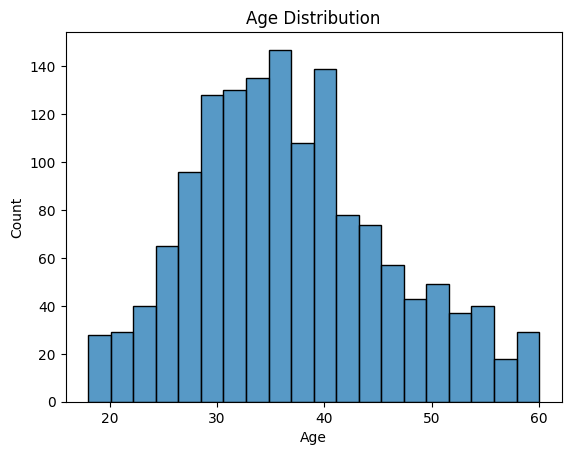

In [30]:
# Example: Histogram of Age
sns.histplot(data['Age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<ipython-input-43-a33d3fe911f1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


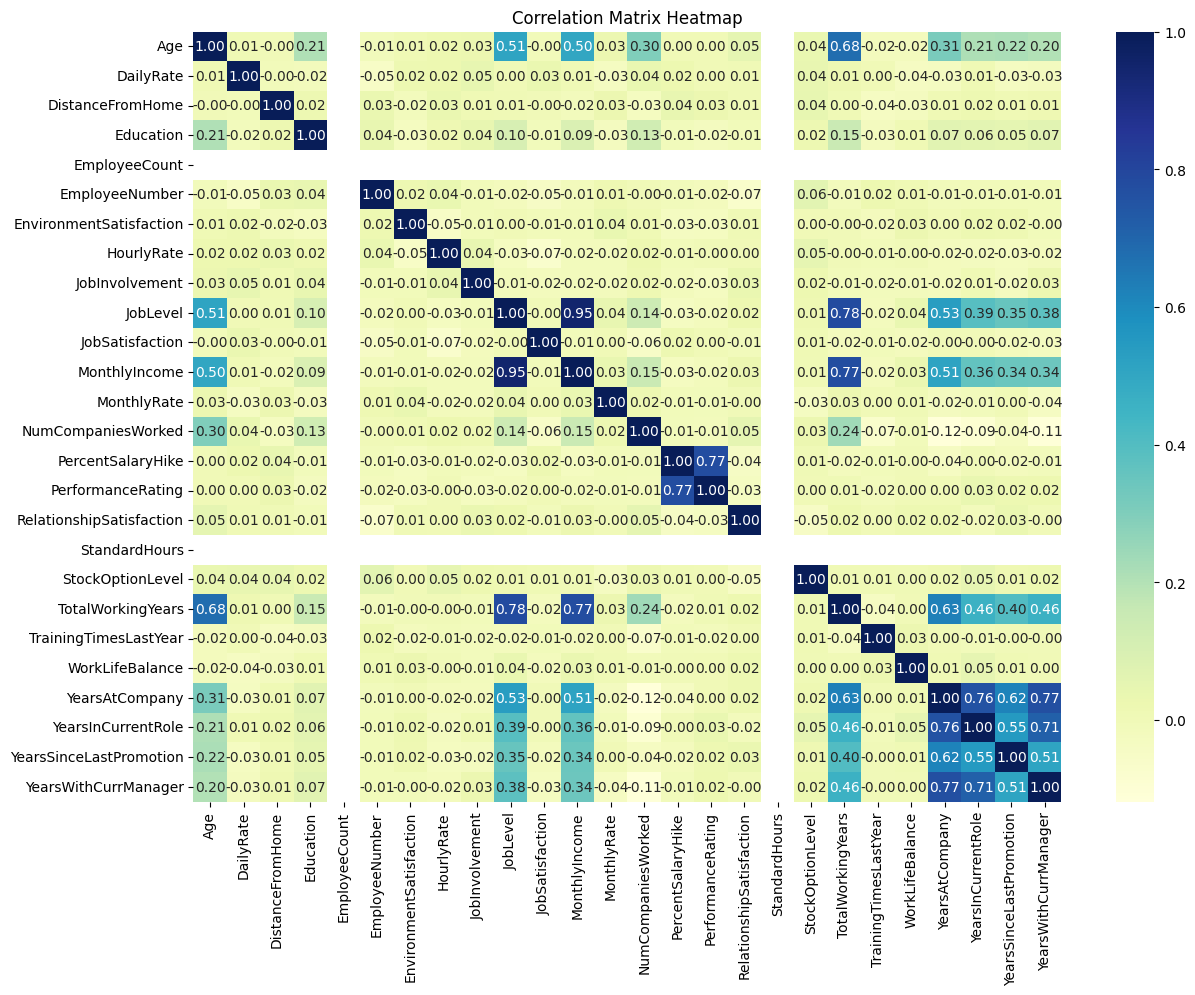

In [43]:
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


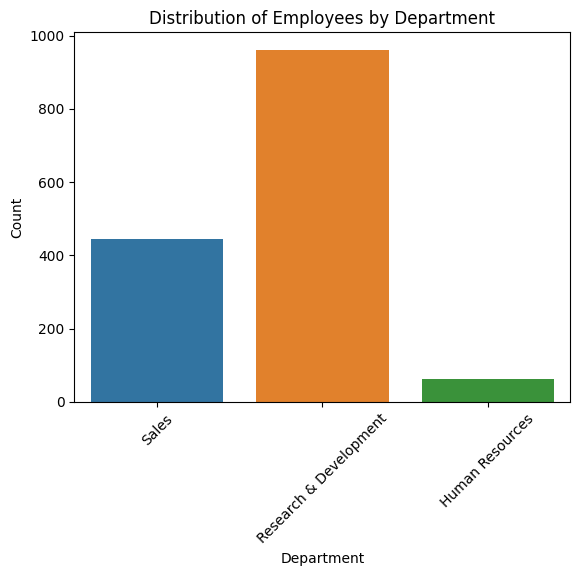

In [32]:
# Example: Countplot for 'Department'
sns.countplot(x='Department', data=data)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Distribution of Employees by Department')
plt.xticks(rotation=45)
plt.show()


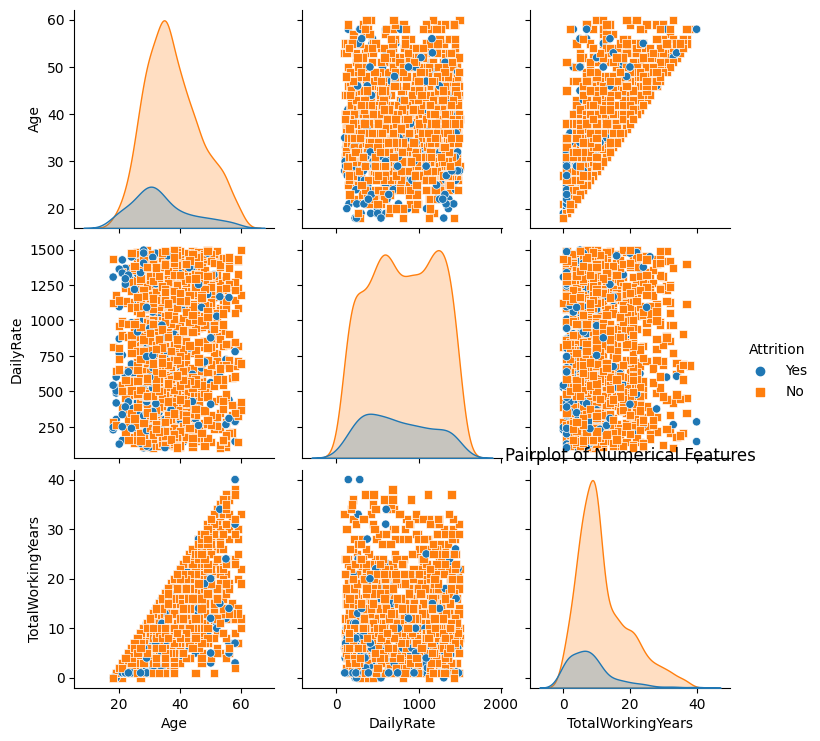

In [33]:
# Create a pairplot for selected numerical columns
sns.pairplot(data[['Age', 'DailyRate', 'TotalWorkingYears', 'Attrition']], hue='Attrition', markers=["o", "s"])
plt.title('Pairplot of Numerical Features')
plt.show()


Outliner Detection

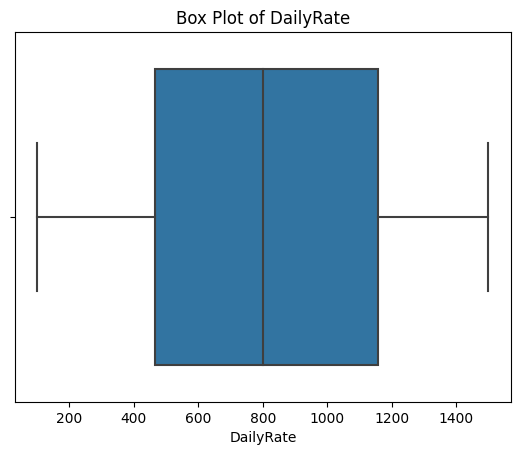

In [34]:
# Example: Box plot for DailyRate
sns.boxplot(x='DailyRate', data=data)
plt.xlabel('DailyRate')
plt.title('Box Plot of DailyRate')
plt.show()


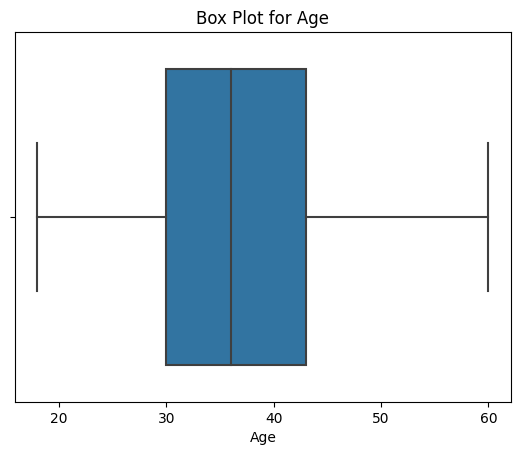

In [84]:
sns.boxplot(x='Age', data=data)
plt.title('Box Plot for Age')
plt.show()

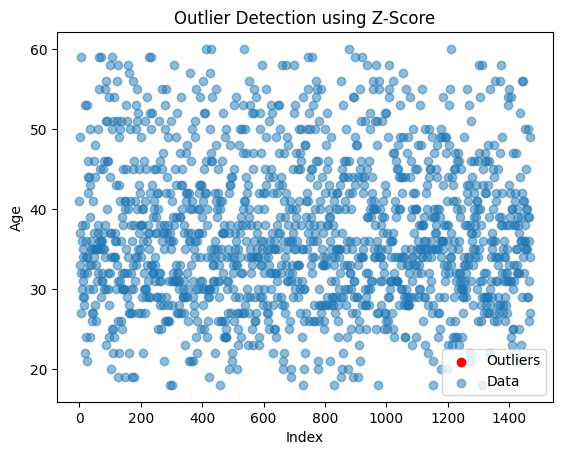

In [13]:
# Used internet for this.

from scipy import stats

# Calculate the Z-score for a specific numerical column (e.g., 'Age')
z_scores = np.abs(stats.zscore(data['Age']))

# Define a threshold for Z-score
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Visualize outliers
plt.scatter(outliers, data['Age'].iloc[outliers], color='red', label='Outliers')
plt.scatter(range(len(data)), data['Age'], alpha=0.5, label='Data')
plt.xlabel('Index')
plt.ylabel('Age')
plt.title('Outlier Detection using Z-Score')
plt.legend()
plt.show()


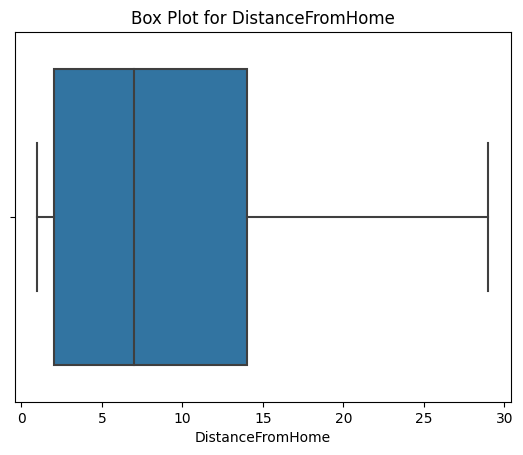

In [36]:
# Box plot for DistanceFromHome
sns.boxplot(x='DistanceFromHome', data=df)
plt.title('Box Plot for DistanceFromHome')
plt.show()

In [37]:
#No outliner exist.

# Test

Splitting Dependent and Independent Variables

In [175]:
X = data.drop('Attrition', axis=1)  # Independent variables
y = data['Attrition']  # Dependent variable


In [176]:
X.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,4,80,1,6,3,3,2,2,2,2


In [177]:
y.head()

0    Yes
1     No
2    Yes
3     No
4     No
Name: Attrition, dtype: object

Perform Encoding

In [178]:
X_en = pd.get_dummies(X, drop_first=True)
X_en

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,0,0,0,1,0,1,0,0


Scaling

In [179]:
scaler = StandardScaler()
X_en[['Age', 'DailyRate','HourlyRate','DistanceFromHome','MonthlyIncome','MonthlyRate']] = scaler.fit_transform(X_en[['Age', 'DailyRate','HourlyRate','DistanceFromHome','MonthlyIncome','MonthlyRate']])

In [180]:
X_en

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.010909,2,1,1,2,1.383138,3,2,...,0,0,0,0,0,1,0,0,1,1
1,1.322365,-1.297775,-0.147150,1,1,2,3,-0.240677,2,2,...,0,0,0,0,1,0,0,1,0,0
2,0.008343,1.414363,-0.887515,2,1,4,4,1.284725,2,1,...,1,0,0,0,0,0,0,0,1,1
3,-0.429664,1.461466,-0.764121,4,1,5,4,-0.486709,3,1,...,0,0,0,0,1,0,0,1,0,1
4,-1.086676,-0.524295,-0.887515,1,1,7,1,-1.274014,3,1,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.703764,2,1,2061,3,-1.224807,4,2,...,1,0,0,0,0,0,0,1,0,0
1466,0.227347,-0.469754,-0.393938,1,1,2062,4,-1.175601,2,3,...,0,0,0,0,0,0,0,1,0,0
1467,-1.086676,-1.605183,-0.640727,3,1,2064,2,1.038693,4,2,...,0,0,1,0,0,0,0,1,0,1
1468,1.322365,0.546677,-0.887515,3,1,2065,4,-0.142264,2,2,...,0,0,0,0,0,1,0,1,0,0


Splitting Data into Train and Test

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X_en, y, test_size=0.2, random_state=42)

In [182]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 47), (294, 47), (1176,), (294,))

# Model-building

In [183]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

Logistic Regression

In [184]:
logistic_model = LogisticRegression(random_state=10)
logistic_model.fit(X_train, y_train)
logistic_pred = logistic_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [185]:
# Evaluation of Logistic Regression model
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_report = classification_report(y_test, logistic_pred)

print("Logistic Regression Model Accuracy:", logistic_accuracy)
print("Logistic Regression Model Classification Report:")
print(logistic_report)

Logistic Regression Model Accuracy: 0.9013605442176871
Logistic Regression Model Classification Report:
              precision    recall  f1-score   support

          No       0.91      0.99      0.95       255
         Yes       0.81      0.33      0.47        39

    accuracy                           0.90       294
   macro avg       0.86      0.66      0.71       294
weighted avg       0.89      0.90      0.88       294



Decision Tree

In [186]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

In [187]:
# Evaluation of Decision Tree model
tree_accuracy = accuracy_score(y_test, tree_predictions)
tree_report = classification_report(y_test, tree_predictions)

print("Decision Tree Model Accuracy:", tree_accuracy)
print("Decision Tree Model Classification Report:")
print(tree_report)

Decision Tree Model Accuracy: 0.7789115646258503
Decision Tree Model Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.87      0.87       255
         Yes       0.17      0.18      0.18        39

    accuracy                           0.78       294
   macro avg       0.52      0.53      0.52       294
weighted avg       0.78      0.78      0.78       294



Random Forest

In [190]:
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)

# Evaluation of Random Forest model
random_forest_accuracy = accuracy_score(y_test, forest_predictions)
random_forest_report = classification_report(y_test, forest_predictions)

print("Random Forest Model Accuracy:", random_forest_accuracy)
print("Random Forest Model Classification Report:")
print(random_forest_report)

Random Forest Model Accuracy: 0.8775510204081632
Random Forest Model Classification Report:
              precision    recall  f1-score   support

          No       0.88      1.00      0.93       255
         Yes       0.80      0.10      0.18        39

    accuracy                           0.88       294
   macro avg       0.84      0.55      0.56       294
weighted avg       0.87      0.88      0.83       294

